# 🛸 Day 4: Quantum Teleportation Protocol

**Author:** [Your Name]
**Objective:** Transmit the state of a qubit ($|\psi\rangle$) from Alice to Bob using entanglement and classical communication.

---

## 🧠 Protocol Overview
1.  **Initialization:** Create a 3-Qubit system ($q_0$ Message, $q_1$ Alice, $q_2$ Bob).
2.  **Entanglement:** Create a Bell Pair between Alice ($q_1$) and Bob ($q_2$).
3.  **Alice's Action:**
    * Entangle the Message ($q_0$) with her half of the Bell Pair ($q_1$).
    * Measure $q_0$ and $q_1$ to send 2 classical bits to Bob.
4.  **Bob's Correction:** Apply gates ($X$ or $Z$) based on Alice's bits to recover $|\psi\rangle$.

**✨ The Magic:** The state $|\psi\rangle$ disappears from Alice and reappears at Bob without traversing the space between them!

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit import transpile
import numpy as np

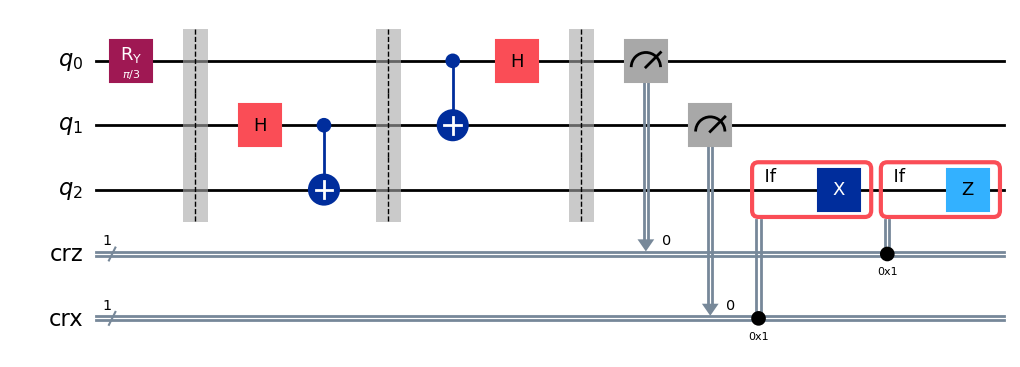

In [3]:
# 1. SETUP
# q0: Message, q1: Alice, q2: Bob
# crz: Bit for Phase Error (from q0), crx: Bit for Bit Error (from q1)
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

# 2. PREPARE MESSAGE (q0)
# Let's rotate q0 to a random state to test
qc.ry(np.pi/3, 0)
qc.barrier()

# 3. CREATE ENTANGLEMENT (q1 & q2)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# 4. ALICE'S OPERATIONS
qc.cx(0, 1)
qc.h(0)
qc.barrier()
# Measure Alice's qubits
qc.measure(0, crz)
qc.measure(1, crx)

# 5. BOB'S CORRECTION
# If crx == 1 -> Bob use X gate
with qc.if_test((crx, 1)):
    qc.x(2)

# Nếu crz == 1 -> Bob use Z gate
with qc.if_test((crz, 1)):
    qc.z(2)

# Draw the circuit
qc.draw('mpl')

Bob's Correction Results (Classical Bits): {'0 1': 244, '1 1': 264, '0 0': 264, '1 0': 252}


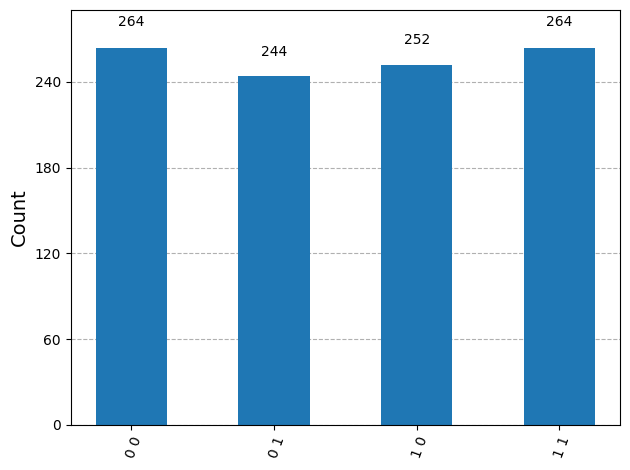

In [4]:
# Simulate using Statevector (God Mode) to check the vector on Bloch Sphere
# Note: In real hardware, we would need tomography, but for sim, this is fine.
# We create a new simulator just for statevector visualization
from qiskit.quantum_info import Statevector

# Important: The statevector simulator will show the FINAL state of q2
# Since q0 and q1 were measured, they collapsed. q2 should hold the original info.
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)

# Run simulation
# Note: For accurate Bloch sphere plotting in Qiskit with measurements, 
# sometimes it's better to use 'statevector_simulator' or remove measurements for visualization.
# But let's try running it to see the output counts first.
result = backend.run(qc_transpiled, shots=1024).result()
counts = result.get_counts()
print("Bob's Correction Results (Classical Bits):", counts)
plot_histogram(counts)